In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [3]:
digits = load_digits()
x = digits.images
y = digits.target

x = x.reshape((-1,64))
print(x)

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, train_size=0.8, shuffle=True)

clf = SVC()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print("\n正解率＝", accuracy_score(y_test, y_pred))

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]

正解率＝ 0.9944444444444445


In [4]:
import pickle

folder_path = "/content/drive/Shareddrives/第5回中高生情報学研究コンテスト/データセット作成用/sav_files"
file_name = "predicted_by_sklearn_8x8.sav"

pickle.dump(clf, open(folder_path + '/' + file_name ,'wb'))  

手書きした画像ファイル


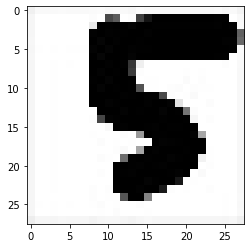

[[240 249 249 249 250 249 249 249 250 251 248 249 249 247 251 249 249 249
  249 249 249 249 249 249 250 247 249 244]
 [246 255 255 255 255 255 255 255 252 255  73  92 255 253  63  20   0   0
    0   0   0   0   0   0   1   1 255 249]
 [246 255 255 255 255 255 255 255 234   0   1   0   0   4   0   0   1   1
    1   1   1   1   1   1   2   0   2 250]
 [246 255 255 255 255 255 255 255   2   0   2   1   1   0   0   2   0   0
    0   0   0   0   0   0   0   0   0  97]
 [247 255 255 255 255 255 255 255   0   5   0   2   0   0   1   0   0   0
    0   0   0   0   0   0   0   2   2 106]
 [246 254 255 254 255 254 254 254   3   0   4   0   0   2   1   1   0   0
    0   0   0   0   0   0   0   0   1 251]
 [247 255 255 255 255 255 255 255   0   6   0   0   0   4   0   0   0   0
    0   0   0   0   0   0   1   1 255 250]
 [246 255 255 254 255 254 255 255   0   0   2   0   2  54 239 255 255 255
  255 255 255 255 255 255 255 253 255 249]
 [246 255 255 254 255 255 255 255   0   3   0   1   0  61 253 25

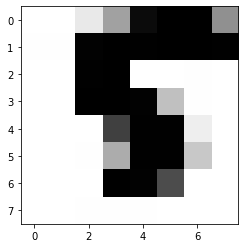

[[255 255 233 161  11   0   0 144]
 [254 254   2   0   1   0   0   1]
 [255 255   1   0 255 255 254 255]
 [255 255   0   0   2 192 254 255]
 [255 255 255  64   1   1 238 255]
 [255 255 254 172   1   1 200 255]
 [255 255 255   0   2  76 255 255]
 [255 255 254 254 254 255 255 255]]


画像を反転させ、16階調に変換したの画像データ
判定結果：この画像は[5]です。


In [10]:
# ★OpenCVを読み込みましょう
import cv2

# ★ 画像を表示するために、matplotlib.pyplotをpltとして読み込みましょう
import matplotlib.pyplot as plt

import pickle   # モデルを読み込むための関数を読み込む

# 保存したモデルを読み込んで、判定した結果を返す関数を定義

def predict_digit(filename):

  #　学習済みモデルを読み込む
  clf = pickle.load(open("/content/drive/Shareddrives/第5回中高生情報学研究コンテスト/データセット作成用/sav_files/predicted_by_sklearn_8x8.sav",'rb'))         #　★保存したモデルのパスを指定しましょう
  
  # 自分で用意した手書き画像を読み込み、表示させましょう。
  my_img = cv2.imread(filename)            #★画像ファイルを読み込む関数を指定しましょう
  my_img = cv2.cvtColor(my_img, cv2.COLOR_BGR2GRAY)

  print("手書きした画像ファイル")   
  plt.imshow(my_img,cmap="gray") # ★　表示する画像データ(my_img)を指定し、グレースケールにしましょう
  plt.show()                                                         # ★　画面に表示しましょう
  print(my_img)                                                         # ★　画像の数値データを表示しましょう

  # 読み込んだ画像を8×8ピクセルに変換し,画像データと数値データを表示しましょう。
  print("\n8×8ピクセルに変換後したの画像データ")
  my_img = cv2.resize(my_img,(8, 8))                  # ★ 画像サイズを変換（リサイズ）する関数を調べて入力しましょう。
  plt.imshow(my_img,cmap="gray")                      # ★　表示する画像データ(my_img)を指定し、グレースケールにしましょう
  plt.show()                                          # ★　画面に表示しましょう
  print(my_img)                                       # ★　画像の数値データを表示しましょう
 
  print("\n")
  print("画像を反転させ、16階調に変換したの画像データ")
  my_img = 15 - my_img // 16


 
  # 二次元を一次元に変換
  my_img = my_img.reshape(-1,64)        # ★ 2次元配列の画像を1次元配列に変換しましょう。

  # ★ 作成した手書き数字のデータから予測してみましょう。
  res = clf.predict(my_img)
  
  return res   #予測結果を返す


# 関数に予測したいファイルを渡して結果を受け取る
n = predict_digit("/content/drive/Shareddrives/第5回中高生情報学研究コンテスト/手書き数字のデータセット/精度判定用画像/dataset.5/124.jpg")      #判定したい画像のファイル名を指定します。

# 結果を表示
print("判定結果：この画像は" + str(n) + "です。")
